### Importa√ß√£o dos dados



In [56]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento



In [52]:
# Normalizar nomes de colunas para evitar erros
def limpar_colunas(df):
    df.columns = df.columns.str.strip().str.lower() #Limpa os espa√ßos e padroniza em min√∫sculo
    return df

In [53]:
# Aplicando a normaliza√ß√£o a cada loja
loja = limpar_colunas(loja)
loja2 = limpar_colunas(loja2)
loja3 = limpar_colunas(loja3)
loja4 = limpar_colunas(loja4)

In [54]:
# Agora todas as colunas est√£o em min√∫sculas e sem espa√ßos
faturamento_t1 = loja['pre√ßo'].sum()
faturamento_t2 = loja2['pre√ßo'].sum()
faturamento_t3 = loja3['pre√ßo'].sum()
faturamento_t4 = loja4['pre√ßo'].sum()

In [55]:
#Mostrar o total do faturamento
print(f'O faturamento da loja 1 foi de R${faturamento_t1}')
print(f'O faturamento da loja 2 foi de R${faturamento_t2}')
print(f'O faturamento da loja 3 foi de R${faturamento_t3}')
print(f'O faturamento da loja 4 foi de R${faturamento_t4}')

O faturamento da loja 1 foi de R$1534509.12
O faturamento da loja 2 foi de R$1488459.06
O faturamento da loja 3 foi de R$1464025.03
O faturamento da loja 4 foi de R$1384497.58


In [57]:
#unindo o faturamento total de cada loja
faturamento_total = faturamento_t1 + faturamento_t2 + faturamento_t3 + faturamento_t4
print(f'O faturamento total foi de R${faturamento_total}')

O faturamento total foi de R$5871490.79


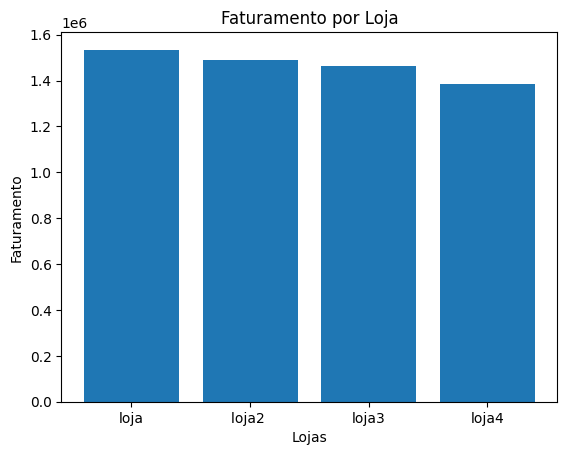

In [58]:
#criando o gr√°fico do faturamento de cada loja
import matplotlib.pyplot as plt

lojas = ['loja', 'loja2 ', 'loja3', 'loja4']
faturamento = [faturamento_t1, faturamento_t2, faturamento_t3, faturamento_t4]

plt.bar(lojas, faturamento)
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
plt.show()

# 2. Vendas por Categoria


In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [60]:
# Acessar as colunas de forma isolada
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [48]:
# Aplicar a normaliza√ß√£o em todas as lojas, renomeando o nome das colunas
def limpar_colunas(df):
    df.columns = df.columns.str.strip().str.lower()
    return df


In [61]:

print(len(loja['Categoria do Produto']))


2359


In [62]:
# Criar as vari√°veis que v√£o receber as listas com a categoria dos produtos.
# O value_counts vai contar quantas vezes a categoria aparece no dataset de cada loja
# O reset_index vai converter o indice da coluna para facilitar a manipula√ß√£ dos dados.
vendas_categoria_loja = loja['Categoria do Produto'].value_counts().reset_index()
vendas_categoria_loja.columns = ['Categoria do Produto', 'quantidade_vendas']

vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts().reset_index()
vendas_categoria_loja2.columns = ['Categoria do Produto', 'quantidade_vendas']

vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts().reset_index()
vendas_categoria_loja3.columns = ['Categoria do Produto', 'quantidade_vendas']

vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts().reset_index()
vendas_categoria_loja4.columns = ['Categoria do Produto', 'quantidade_vendas']

In [63]:
# Exibir as categorias mais vendidas de cada loja, com duas colunas categoria e vendas
print("\nüì¶ Categorias mais vendidas - Loja 1")
print(vendas_categoria_loja)

print("\nüì¶ Categorias mais vendidas - Loja 2")
print(vendas_categoria_loja2)

print("\nüì¶ Categorias mais vendidas - Loja 3")
print(vendas_categoria_loja3)

print("\nüì¶ Categorias mais vendidas - Loja 4")
print(vendas_categoria_loja4)


üì¶ Categorias mais vendidas - Loja 1
    Categoria do Produto  quantidade_vendas
0                 moveis                465
1            eletronicos                448
2             brinquedos                324
3       eletrodomesticos                312
4        esporte e lazer                284
5  instrumentos musicais                182
6                 livros                173
7  utilidades domesticas                171

üì¶ Categorias mais vendidas - Loja 2
    Categoria do Produto  quantidade_vendas
0                 moveis                442
1            eletronicos                422
2             brinquedos                313
3       eletrodomesticos                305
4        esporte e lazer                275
5  instrumentos musicais                224
6                 livros                197
7  utilidades domesticas                181

üì¶ Categorias mais vendidas - Loja 3
    Categoria do Produto  quantidade_vendas
0                 moveis                499


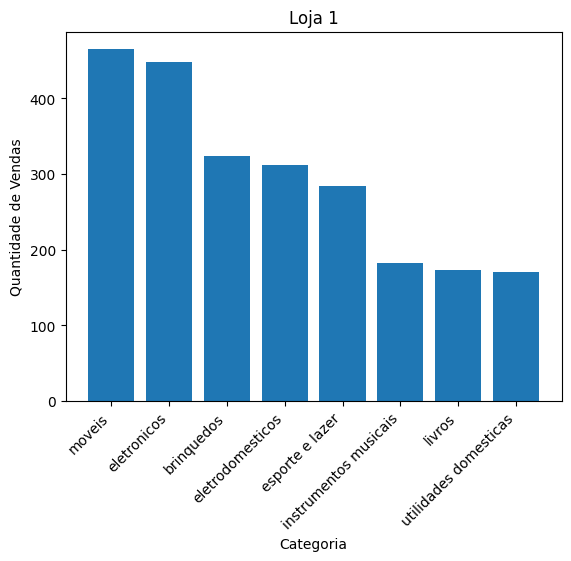

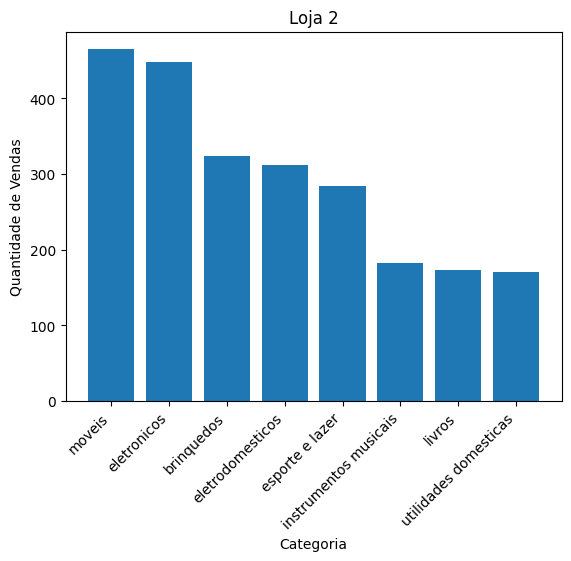

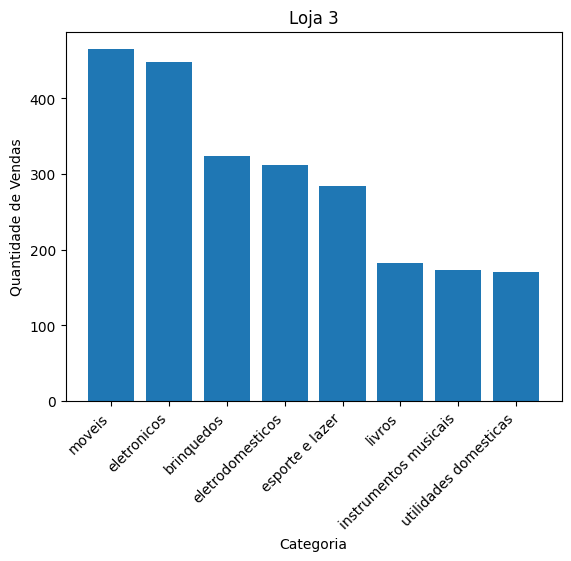

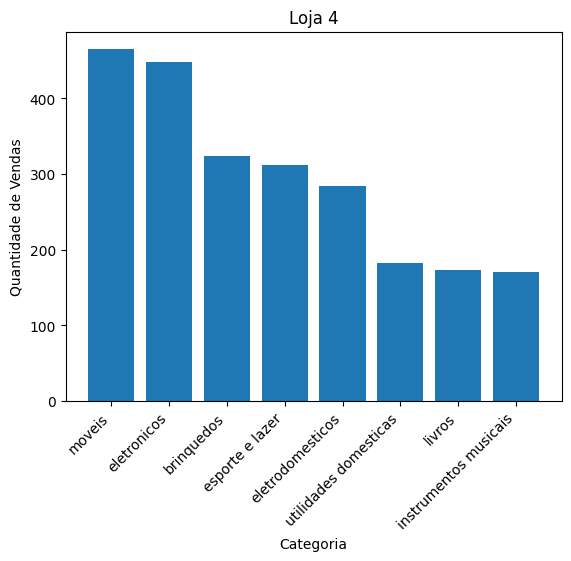

In [91]:
import matplotlib.pyplot as plt

plt.bar(vendas_categoria_loja['Categoria do Produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 1')
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes das categorias para melhor visualiza√ß√£o
plt.show()

plt.bar(vendas_categoria_loja2['Categoria do Produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 2')
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes das categorias para melhor visualiza√ß√£o
plt.show()

plt.bar(vendas_categoria_loja3['Categoria do Produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 3')
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes das categorias para melhor visualiza√ß√£o
plt.show()

plt.bar(vendas_categoria_loja4['Categoria do Produto'], vendas_categoria_loja['quantidade_vendas'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.title('Loja 4')
plt.xticks(rotation=45, ha='right')  # Rotacionando os nomes das categorias para melhor visualiza√ß√£o
plt.show()

<ipython-input-88-5a9f541b78fd>:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


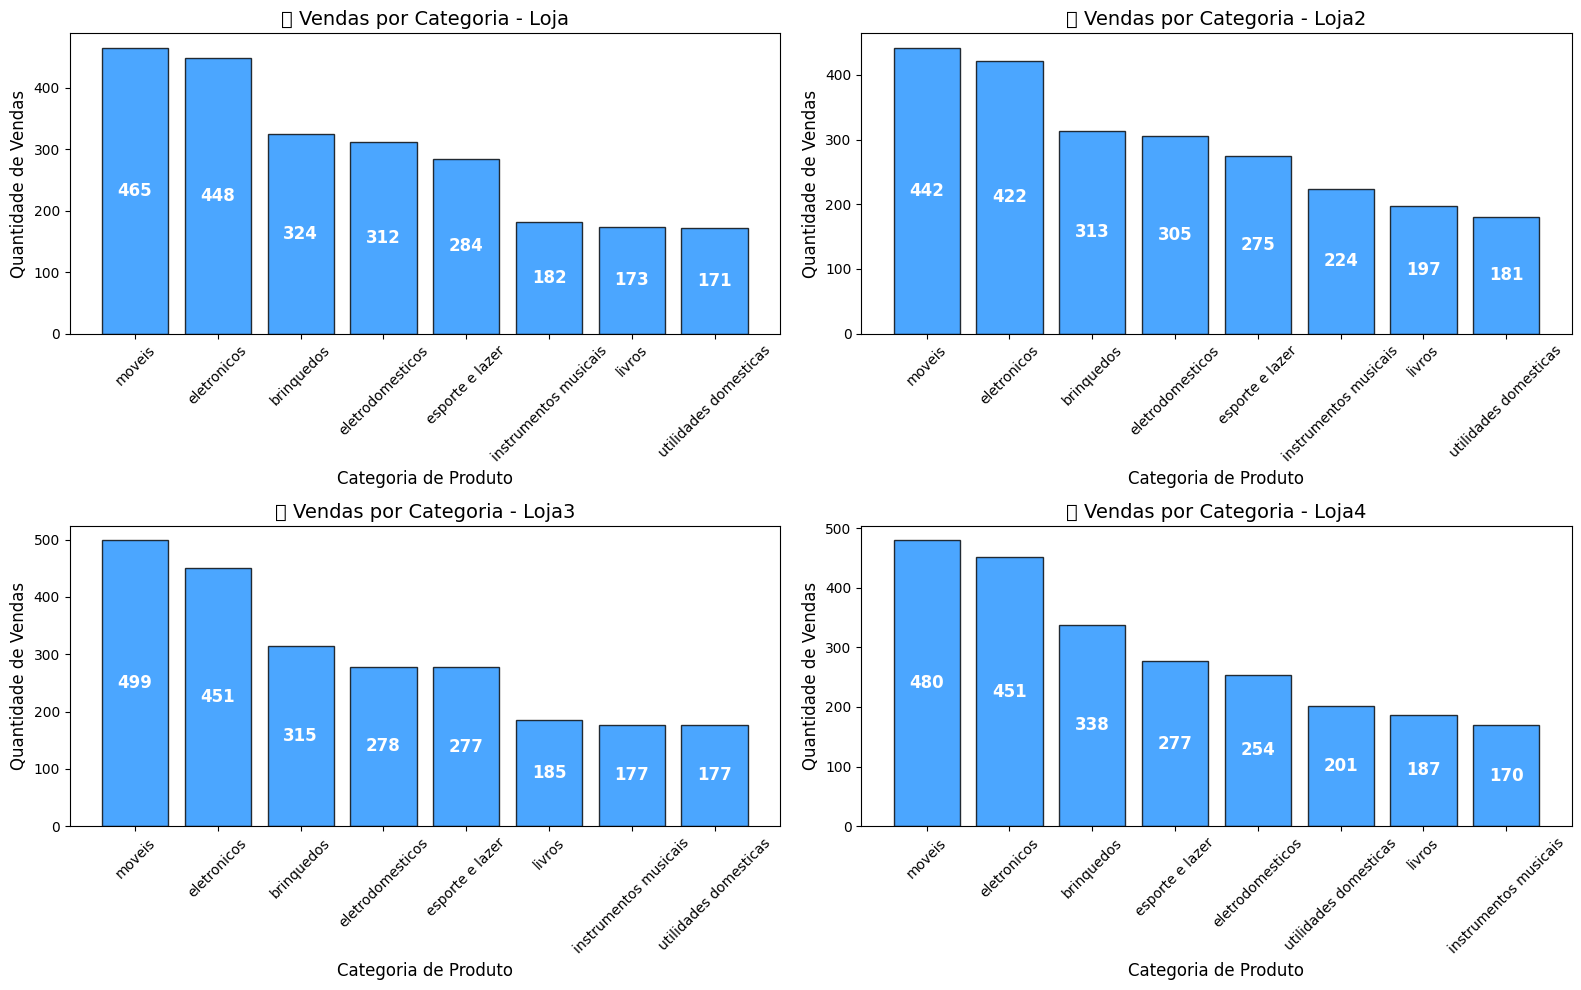

In [88]:
# Os gr√°ficos acima ficaram com a parte da descri√ß√£o das barras com os nomes de cada uma
# se sobrepondo umas as outras. Com a ajudinha do Copilot, criei uma forma de visualizar
# a quantidade de vendas de cada categoria em cada barra

import matplotlib.pyplot as plt

# Criando subplots para exibir os gr√°ficos de todas as lojas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Organizando os subplots

# Criando o loop para gerar um gr√°fico de categorias para cada loja
for i, (df, nome_loja) in enumerate(zip(
    [vendas_categoria_loja, vendas_categoria_loja2, vendas_categoria_loja3, vendas_categoria_loja4],
    ['Loja', 'Loja2', 'Loja3', 'Loja4']
)):
    categorias = df['Categoria do Produto']
    quantidades = df['quantidade_vendas']

    # Criando gr√°fico de barras
    barras = axes[i].bar(categorias, quantidades, color='dodgerblue', edgecolor='black', alpha=0.8)

    # Adicionando os valores dentro das barras
    for barra in barras:
        altura = barra.get_height()
        axes[i].text(barra.get_x() + barra.get_width()/2, altura/2, f'{int(altura)}',
                     ha='center', va='center', fontsize=12, color='white', fontweight='bold')

    # Configura√ß√£o do gr√°fico
    axes[i].set_title(f'üìä Vendas por Categoria - {nome_loja}', fontsize=14)
    axes[i].set_xlabel('Categoria de Produto', fontsize=12)
    axes[i].set_ylabel('Quantidade de Vendas', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Ajuste do layout para evitar sobreposi√ß√£o
plt.tight_layout()
plt.show()

# conclu√≠mos aqui que todas as lojas tem uma venda signficativa na categoria moveis.

# 3. M√©dia de Avalia√ß√£o das Lojas

In [18]:
# Criei um replace para o nome da coluna avalia√ß√£o da compra para normalizar o nome da coluna
loja.columns = loja.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("avalia√ß√£o_da_compra", "avaliacao")
loja2.columns = loja2.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("avalia√ß√£o_da_compra", "avaliacao")
loja3.columns = loja3.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("avalia√ß√£o_da_compra", "avaliacao")
loja4.columns = loja4.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("avalia√ß√£o_da_compra", "avaliacao")

In [20]:
# Criei o c√°lculo de m√©dia das avalia√ß√µes, usando o m√©todo mean
media_avaliacao_loja = loja['avaliacao'].mean()
media_avaliacao_loja2 = loja2['avaliacao'].mean()
media_avaliacao_loja3 = loja3['avaliacao'].mean()
media_avaliacao_loja4 = loja4['avaliacao'].mean()

In [25]:
# Agora formatar a resposta com o formatador .2f
print("\nüìä M√©dia de cada loja")
print(f"Loja 1: {media_avaliacao_loja:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")


üìä M√©dia de cada loja
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


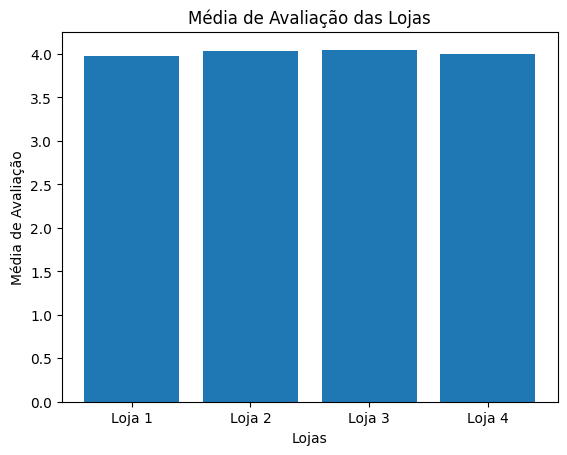

In [29]:
# Por fim criar o gr√°fico de avalia√ß√£o das lojas.
import matplotlib.pyplot as plt
plt.bar(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], [media_avaliacao_loja, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4])
plt.xlabel('Lojas')
plt.ylabel('M√©dia de Avalia√ß√£o')
plt.title('M√©dia de Avalia√ß√£o das Lojas')
plt.show()

# conclu√≠mos at√© aqui que todas a loja 1 tem a pior avalia√ß√£o.

# 4. Produtos Mais e Menos Vendidos

In [32]:
# Agora vou fazer a contagem dos produtos mais e menos vendidos usando o value counts e o reset index
# como fizemos na categoria de produtos
vendas_produtos_loja1 = loja["produto"].value_counts().reset_index()
vendas_produtos_loja1.columns = ["produto", "quantidade_vendida"]

vendas_produtos_loja2 = loja2["produto"].value_counts().reset_index()
vendas_produtos_loja2.columns = ["produto", "quantidade_vendida"]

vendas_produtos_loja3 = loja3["produto"].value_counts().reset_index()
vendas_produtos_loja3.columns = ["produto", "quantidade_vendida"]

vendas_produtos_loja4 = loja4["produto"].value_counts().reset_index()
vendas_produtos_loja4.columns = ["produto", "quantidade_vendida"]


In [68]:
# Agora, vou puxar os 5 produtos mais vendidos com head e os menos vendidos com tail

print("\nüì¶ 5 mais vendidos da Loja 1")
print(vendas_produtos_loja1.head())

print("\nüì¶ 5 menos vendidos da Loja 1")
print((vendas_produtos_loja1.tail()))

print("\nüì¶ 5 mais vendidos da Loja 2")
print(vendas_produtos_loja2.head())

print("\nüì¶ 5 menos vendidos da Loja 2")
print((vendas_produtos_loja2.tail()))

print("\nüì¶ 5 mais vendidos da Loja 3")
print(vendas_produtos_loja3.head())

print("\nüì¶ 5 menos vendidos da Loja 3")
print((vendas_produtos_loja3.tail()))

print("\nüì¶ 5 mais vendidos da Loja 4")
print(vendas_produtos_loja4.head())

print("\nüì¶ 5 menos vendidos da Loja 4")
print((vendas_produtos_loja4.tail()))


üì¶ 5 mais vendidos da Loja 1
              produto  quantidade_vendida
0         Micro-ondas                  60
1       TV Led UHD 4K                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4              C√¥moda                  56

üì¶ 5 menos vendidos da Loja 1
                        produto  quantidade_vendida
46  Ci√™ncia de dados com python                  39
47                     Pandeiro                  36
48            Panela de press√£o                  35
49                      Headset                  33
50                 Celular ABXY                  33

üì¶ 5 mais vendidos da Loja 2
                    produto  quantidade_vendida
0  Iniciando em programa√ß√£o                  65
1               Micro-ondas                  62
2                   Bateria                  61
3                    Viol√£o                  58
4                  Pandeiro                  58

üì¶ 5 menos vendidos da Loja 2
            

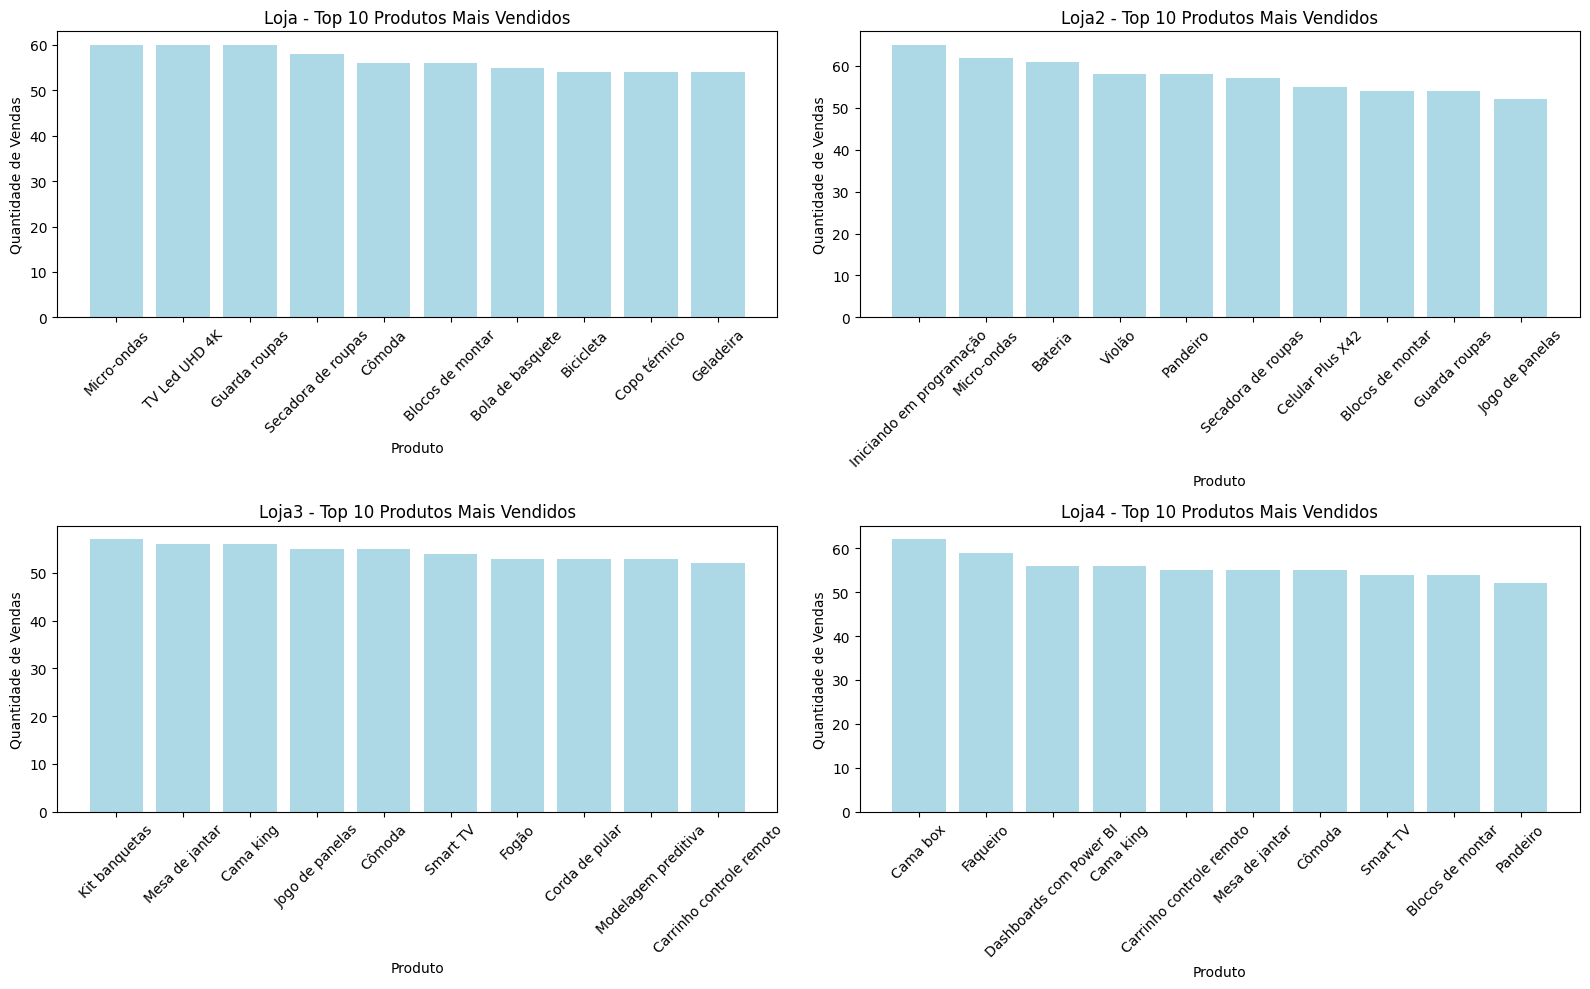

In [75]:
#Agora vou organizar os dados para mostrar os produtos mais vendidos


# Agora vou usar o fig e o axes para subplotar os gr√°ficos e utilizar os
# resultados para visualizar os gr√°ficos de todas as lojas de uma unica vez
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# Agora criar um Loop para os gr√°ficos de cada loja
for i, (df, nome_loja) in enumerate(zip(
    [vendas_produtos_loja1, vendas_produtos_loja2, vendas_produtos_loja3, vendas_produtos_loja4],
    ['Loja', 'Loja2', 'Loja3', 'Loja4']
)):
    axes[i].bar(df['produto'].head(10), df['quantidade_vendida'].head(10), color='lightblue')
    axes[i].set_title(f'{nome_loja} - Top 10 Produtos Mais Vendidos')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Quantidade de Vendas')
    axes[i].set_xlabel('Produto')

# E Ajustar layout para evitar sobreposi√ß√µes
plt.tight_layout()
plt.show()

# Conclu√≠mos aqui que cada loja tem variedades para vendas de produtos, sendo esses os 10 mais vendidos

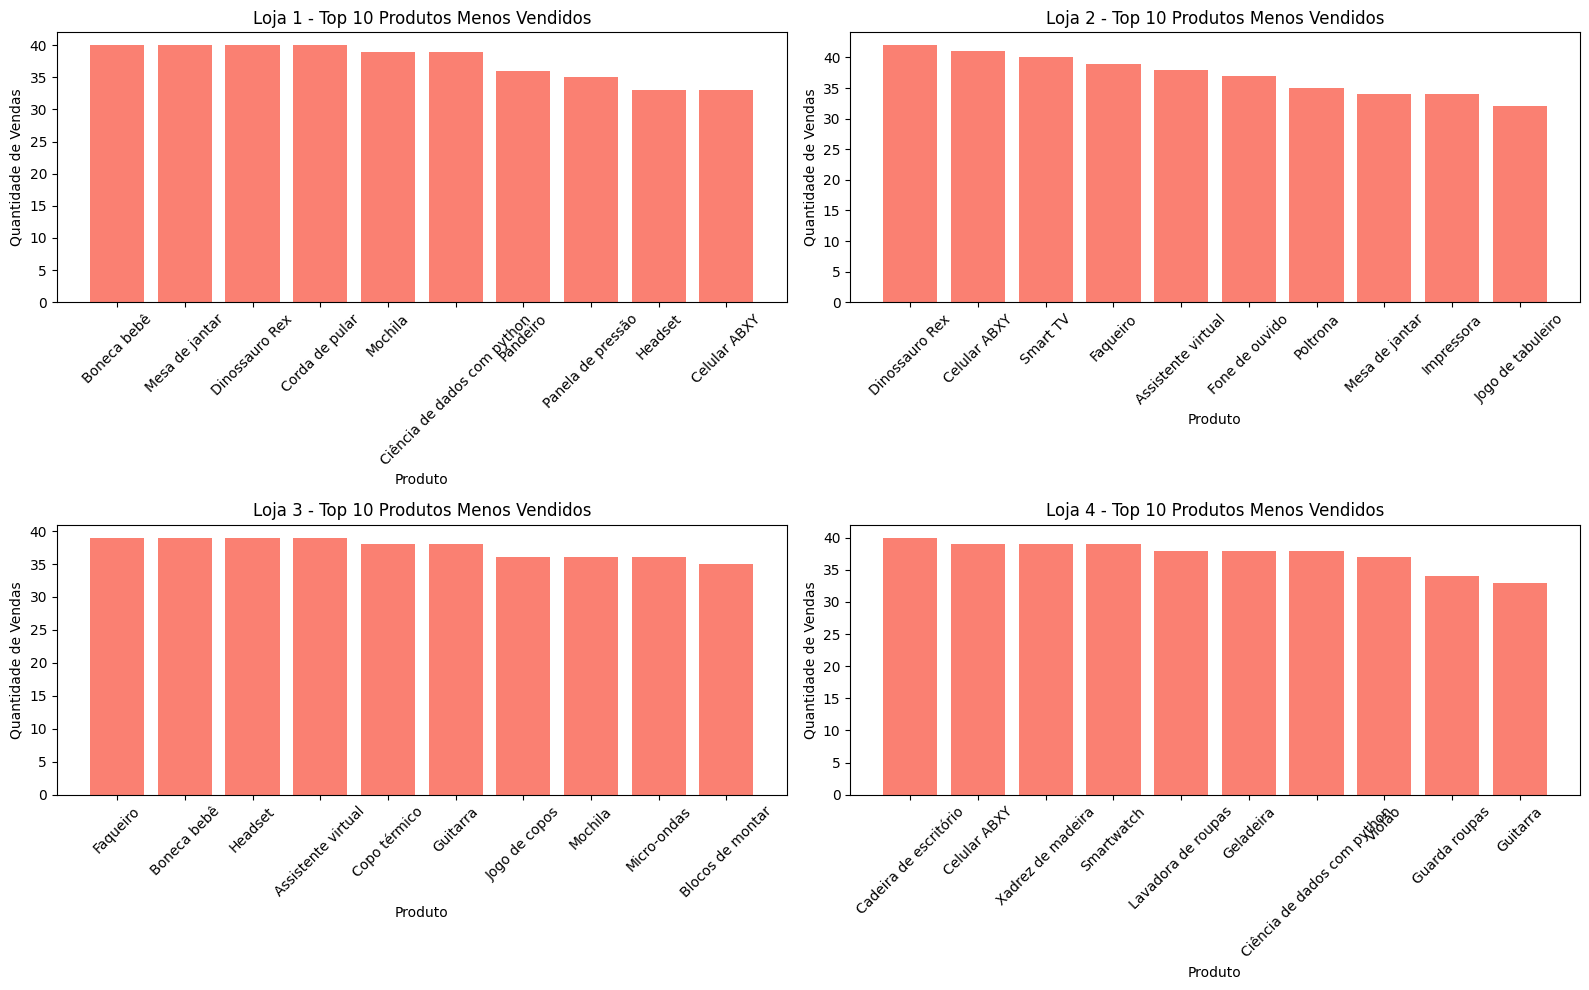

In [78]:
# E agora os produtos menos vendidos

# Criando subplots para visualizar os 5 produtos menos vendidos de cada loja
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # Organizando os subplots

# Loop para criar gr√°ficos de cada loja
for i, (df, nome_loja) in enumerate(zip(
    [vendas_produtos_loja1, vendas_produtos_loja2, vendas_produtos_loja3, vendas_produtos_loja4],
    ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
)):
    axes[i].bar(df['produto'].tail(10), df['quantidade_vendida'].tail(10), color='salmon')
    axes[i].set_title(f'{nome_loja} - Top 10 Produtos Menos Vendidos')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Quantidade de Vendas')
    axes[i].set_xlabel('Produto')

# Ajustar layout para evitar sobreposi√ß√µes
plt.tight_layout()
plt.show()

# Conclu√≠mos aqui que cada loja tem variedades para quedas nas vendas de produtos, sendo esses os 10 menos vendidos

# 5. Frete M√©dio por Loja


In [82]:
# Aqui eu vou seguir na mesma estrutura que fiz para categoria de vendas de produtos mais e menos vendidos
# usando o metodo mean para calcular a media do frete

frete_medio = loja['Frete'].mean()
frete_medio2 = loja2['Frete'].mean()
frete_medio3 = loja3['Frete'].mean()
frete_medio4 = loja4['Frete'].mean()

print(f'o Custo m√©dio do frete foi de R${frete_medio:.2f}')
print(f'o Custo m√©dio do frete foi de R${frete_medio2:.2f}')
print(f'o Custo m√©dio do frete foi de R${frete_medio3:.2f}')
print(f'o Custo m√©dio do frete foi de R${frete_medio4:.2f}')

o Custo m√©dio do frete foi de R$34.69
o Custo m√©dio do frete foi de R$33.62
o Custo m√©dio do frete foi de R$33.07
o Custo m√©dio do frete foi de R$31.28


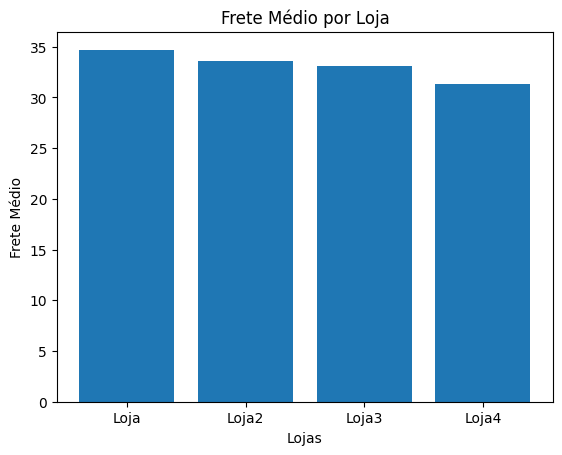

In [90]:
plt.bar(['Loja', 'Loja2', 'Loja3', 'Loja4'], [frete_medio, frete_medio2, frete_medio3, frete_medio4])

plt.xlabel('Lojas')
plt.ylabel('Frete M√©dio')
plt.title('Frete M√©dio por Loja')
plt.show()

# conclu√≠mos com este gr√°fico que a loja 1 tem um custo maior com frete.